# Pyber Ride Sharing
Fare is directly related to the amount of rides. Example: Rural areas, with less riders has the highest average fare
Fare is directly related to the amound of drivers. Competition drives down fare prices
Pyber demand correlates with population density

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Import CSV
ride_df = pd.read_csv("ride_data.csv")
city_df = pd.read_csv("city_data.csv")

In [3]:
# Average Fare ($) Per City 
City_Stats = ride_df.groupby(['city'])
Average_Fare = City_Stats[['fare']].mean().reset_index()
Average_Fare['fare']=Average_Fare['fare']#.map("${0:,.2f}".format)

# Total Number of Rides Per City
Rider_Total = City_Stats[['ride_id']].count().reset_index()

# Total Number of Drivers Per City
Driver_Total = city_df[['city','driver_count']]

# City Type (Urban, Suburban, Rural)
City_Type = city_df[['city','type']]

In [4]:
# Merge into one data frame
merge_one = Average_Fare.merge(Rider_Total,  on = 'city', how='outer')
merge_two = Driver_Total.merge(City_Type, on = 'city', how = 'outer')
merge_three = merge_one.merge(merge_two, on = 'city', how = 'outer')
merge_three.columns = ['City','Average Fare','Total Rides','Total Drivers','City Type']
merge_three.head()

,City,Average Fare,Total Rides,Total Drivers,City Type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


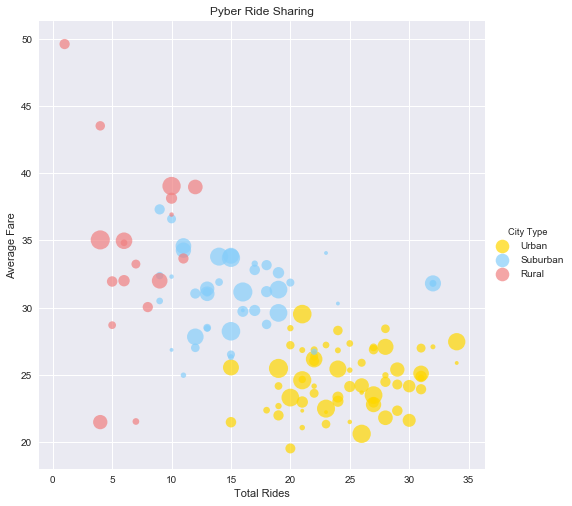

In [5]:
# Set style of scatterplot
colors = ["gold", "lightcoral", "lightskyblue"]
sns.set()
# Create scatterplot of dataframe
sns.lmplot('Total Rides', # Horizontal axis
           'Average Fare', # Vertical axis
           data=merge_three, # Data source
           fit_reg=False, # Don't fix a regression line
           hue= "City Type",
           size =7,
           aspect =1,
           palette=dict(Urban="gold", Suburban="lightskyblue",Rural = "lightcoral"),
           scatter_kws={"marker": "o", "alpha":.7,"s":(merge_three['Total Drivers']*5)}) # S marker size, multiplied for visual impact

# Set title
plt.title('Pyber Ride Sharing')

# Set x-axis label
plt.xlabel('Total Rides')

# Set y-axis label
plt.ylabel('Average Fare')
plt.show()

In [6]:
city_type = merge_three.groupby(["City Type"]).sum().reset_index()


In [7]:
labels = city_type['City Type']
ave_fare = city_type['Average Fare']
tot_ride = city_type['Total Rides']
tot_drive = city_type['Total Drivers']
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0.1, .1, 0) 

# TOTAL FARE BY CITY TYPE

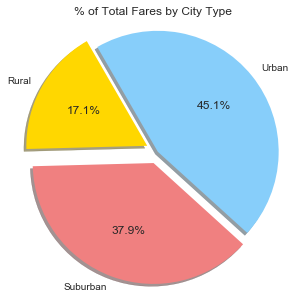

In [8]:
plt.figure(figsize=(5,5))
x = ave_fare
plt.title("% of Total Fares by City Type") 
plt.pie(x, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

# TOTAL RIDES BY CITY TYPE

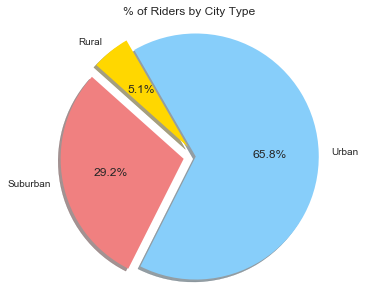

In [9]:
# RIDERS BY CITY TYPE
plt.figure(figsize=(5,5))
x = tot_ride
plt.title("% of Riders by City Type")
plt.pie(x, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

# TOTAL DRIVERS BY CITY TYPE

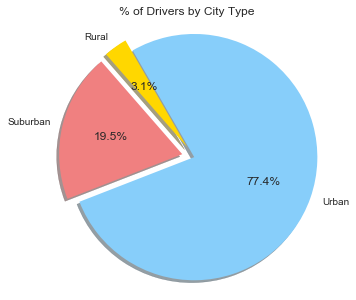

In [10]:
# DRIVERS BY CITY TYPE
plt.figure(figsize=(5,5))
x = tot_drive
plt.title("% of Drivers by City Type")
plt.pie(x, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()